In [171]:
import os
import sys

In [172]:
sys.path.append(os.path.abspath(os.path.join('Data')))
sys.path.append(os.path.abspath(os.path.join('Scripts_')))
sys.path.insert(0,'../Scripts_/')
from Convertions import CleanTelecomData

In [204]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [175]:
df = pd.read_csv('../Data/clean_data_source(CSV).csv')


In [176]:
Cleaned=CleanTelecomData(df)

Automation in Action...!!!


In [177]:
Cleaned.get_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   bearer_id                       150001 non-null  object 
 1   start                           150001 non-null  object 
 2   start_ms                        150001 non-null  float64
 3   end                             150001 non-null  object 
 4   end_ms                          150001 non-null  float64
 5   dur._(ms)                       150001 non-null  float64
 6   imsi                            150001 non-null  object 
 7   msisdn/number                   150001 non-null  object 
 8   imei                            150001 non-null  object 
 9   last_location_name              150001 non-null  object 
 10  avg_rtt_dl_(ms)                 150001 non-null  float64
 11  avg_rtt_ul_(ms)                 150001 non-null  float64
 12  avg_bearer_tp_dl

In [178]:
cleann= CleanTelecomData(Cleaned.get_info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   bearer_id                       150001 non-null  object 
 1   start                           150001 non-null  object 
 2   start_ms                        150001 non-null  float64
 3   end                             150001 non-null  object 
 4   end_ms                          150001 non-null  float64
 5   dur._(ms)                       150001 non-null  float64
 6   imsi                            150001 non-null  object 
 7   msisdn/number                   150001 non-null  object 
 8   imei                            150001 non-null  object 
 9   last_location_name              150001 non-null  object 
 10  avg_rtt_dl_(ms)                 150001 non-null  float64
 11  avg_rtt_ul_(ms)                 150001 non-null  float64
 12  avg_bearer_tp_dl

In [179]:
from Convertions import CleanTelecomData

In [180]:
cleann=Cleaned.bytes_to_megabytes(['total_dl_(bytes)','total_ul_(bytes)','youtube_ul_(bytes)','youtube_dl_(bytes)','google_dl_(bytes)','google_ul_(bytes)','netflix_dl_(bytes)','netflix_ul_(bytes)','gaming_dl_(bytes)','gaming_ul_(bytes)','email_dl_(bytes)','email_ul_(bytes)','google_dl_(bytes)','google_ul_(bytes)','social_media_dl_(bytes)','social_media_ul_(bytes)'])

failed to convert to MB


In [181]:
cleann.head()

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,avg_rtt_dl_(ms),avg_rtt_ul_(ms),avg_bearer_tp_dl_(kbps),avg_bearer_tp_ul_(kbps),dl_tp_<_50_kbps_(%),50_kbps_<_dl_tp_<_250_kbps_(%),250_kbps_<_dl_tp_<_1_mbps_(%),dl_tp_>_1_mbps_(%),ul_tp_<_10_kbps_(%),10_kbps_<_ul_tp_<_50_kbps_(%),50_kbps_<_ul_tp_<_300_kbps_(%),ul_tp_>_300_kbps_(%),activity_duration_dl_(ms),activity_duration_ul_(ms),dur._(ms).1,handset_manufacturer,handset_type,nb_of_sec_with_vol_dl_<_6250b,nb_of_sec_with_vol_ul_<_1250b,social_media_dl_(bytes),social_media_ul_(bytes),google_dl_(MegaBytes),google_ul_(MegaBytes),email_dl_(MegaBytes),email_ul_(MegaBytes),youtube_dl_(MegaBytes),youtube_ul_(MegaBytes),netflix_dl_(MegaBytes),netflix_ul_(MegaBytes),gaming_dl_(MegaBytes),gaming_ul_(MegaBytes),other_dl_(bytes),other_ul_(bytes),total_ul_(MegaBytes),total_dl_(MegaBytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,208201448079117.0,33664962239.0,35521209507511.0,9164566995485190,42.000000,5.0,23.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1.634479,1.271433,3.563542,0.137762,15.854611,2.501332,8.198936,9.656251,278.082303,14.344150,171744450.0,8814393.0,36.749741,308.879636
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,208201909211140.0,33681854413.0,35794009006359.0,L77566A,65.000000,5.0,16.0,26.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113.0,7165.0,3.493924,0.920172,0.629046,0.308339,20.247395,19.111729,18.338413,17.227132,608.750074,1.170709,526904238.0,15055145.0,53.800391,653.384965
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,208200314458056.0,33760627129.0,35281510359387.0,D42335A,109.795706,6.0,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1684053.0,42224.0,8.535055,1.694064,2.690151,0.672973,19.725661,14.699576,17.587794,6.163408,229.584621,0.395630,410692588.0,4215763.0,27.883638,279.807335
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,208201402342131.0,33750343200.0,35356610164913.0,T21824A,109.795706,44.0,44.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,3330.0,37882.0,1.321510e+09,undefined,undefined,17.0,207.0,644121.0,13372.0,9.023734,2.788027,1.439754,0.631229,21.388122,15.146643,13.994646,1.097942,799.538153,10.849722,749039933.0,12797283.0,43.324218,846.028530
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,208201401415120.0,33699795932.0,35407009745539.0,D88865A,109.795706,6.0,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,607.0,604.0,862600.0,50188.0,6.248284,1.500559,1.936496,0.173853,15.259380,18.962873,17.124581,0.415218,527.707248,3.529801,550709500.0,13910322.0,38.542814,569.138589


### Task 1.1

###### Number of xDR sessions

In [118]:
xDR_sessions = cleann.groupby('msisdn/number').agg({'bearer_id': 'count'})
xDR_sessions = xDR_sessions.rename(columns= {'bearer_id': 'xDR_sessions'})
xDR_sessions.sort_values(by=['xDR_sessions'], ascending = False).head(10)

,xDR_sessions
msisdn/number,
109.79570605376027,97
109.79570605376028,39
33626320676.0,18
33625779332.0,17
33614892860.0,16
33760536639.0,14
33675877202.0,13
33667163239.0,13
33603127838.0,12


In [119]:
xDR_sessions.describe()

,xDR_sessions
count,117287.000000
mean,1.278923
std,0.710417
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,97.000000


##### Session duration

In [125]:
total_data_df = cleann[['msisdn/number','total_ul_(MegaBytes)','total_dl_(MegaBytes)']].copy()
total_data_df = total_data_df.groupby('msisdn/number').sum()
total_data_df['total_data(MegaBytes)'] = total_data_df['total_ul_(MegaBytes)'] + total_data_df['total_dl_(MegaBytes)']
total_data_df.sort_values(by=['total_data(MegaBytes)'], ascending = False).head(10)

,total_ul_(MegaBytes),total_dl_(MegaBytes),total_data(MegaBytes)
msisdn/number,,,
109.79570605376027,4003.449404,41323.599767,45327.049171
109.79570605376028,1656.658049,16637.013482,18293.671531
33625779332.0,729.577380,7770.043342,8499.620722
33760536639.0,656.193062,7332.347986,7988.541048
33626320676.0,669.650721,7301.516540,7971.167261
33614892860.0,633.476463,7328.221743,7961.698206
33666464084.0,405.060976,6903.439962,7308.500938
33760413819.0,521.518890,6610.851624,7132.370514
33675877202.0,493.381560,6316.202977,6809.584537


##### The total data volume (in MegaBytes) during this session for each application

In [184]:
cleann["social_media"] = cleann["social_media_dl_(bytes)"] + cleann['social_media_ul_(bytes)']
cleann["google"] = cleann["google_dl_(MegaBytes)"] + cleann["google_ul_(MegaBytes)"]
cleann['email'] = cleann["email_dl_(MegaBytes)"] + cleann["email_ul_(MegaBytes)"]
cleann['youtube'] = cleann["youtube_dl_(MegaBytes)"] + cleann["youtube_ul_(MegaBytes)"]
cleann['netflix'] = cleann["netflix_dl_(MegaBytes)"] + cleann["netflix_ul_(MegaBytes)"]
cleann["gaming"] = cleann["gaming_dl_(MegaBytes)"] + cleann["gaming_ul_(MegaBytes)"]
cleann['other']= cleann["other_dl_(bytes)"]+ cleann["other_ul_(bytes)"]
cleann['total_data'] = cleann['total_dl_(MegaBytes)'] + cleann['total_ul_(MegaBytes)']

In [264]:
total_data_volume = cleann[['msisdn/number','social_media','google',
                             'email', 'youtube','netflix', 'gaming','other','total_data']].copy()

In [265]:
total_data_volume.groupby('msisdn/number').sum().sample(10)

,social_media,google,email,youtube,netflix,gaming,other,total_data
msisdn/number,,,,,,,,
33662657597.0,2555622.0,9.831864,3.842157,37.941647,26.917224,489.470893,1.759730e+08,579.285523
33650644662.0,1926604.0,14.886467,2.066962,39.279149,49.859656,748.869679,3.894851e+08,883.939139
33699028091.0,805227.0,1.666316,2.842541,31.360601,28.806531,639.069835,3.584825e+08,708.359594
33760411948.0,2590587.0,10.886240,3.913799,16.789793,36.204597,520.100107,4.193604e+08,600.141166
33621131629.0,567422.0,4.880986,0.873033,15.856747,0.586827,83.697188,3.858580e+08,112.669707
33698028950.0,3515980.0,23.347128,5.831719,58.787990,35.807773,677.645801,1.027143e+09,820.333505
33664029921.0,411573.0,11.425865,1.755866,21.235911,15.457427,577.327569,3.466656e+08,638.517071
33685776247.0,1499573.0,13.529343,2.559396,25.915974,26.475235,672.219987,4.924940e+07,752.140955
33645791319.0,2918478.0,5.912991,4.711264,46.015770,63.877758,1023.446418,1.095111e+09,1164.787816


In [266]:
total_data_df.describe()

,total_ul_(MegaBytes),total_dl_(MegaBytes),total_data(MegaBytes)
count,117287.000000,117287.000000,117287.000000
mean,52.590491,581.449901,634.040392
std,31.891257,421.655091,444.310329
min,2.866892,7.114041,28.956107
25%,35.552323,293.148239,336.192755
50%,45.074423,538.407477,584.315486
75%,58.413227,769.471493,817.599756
max,4003.449404,41323.599767,45327.049171


In [267]:
cleann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   bearer_id                       150001 non-null  object 
 1   start                           150001 non-null  object 
 2   start_ms                        150001 non-null  float64
 3   end                             150001 non-null  object 
 4   end_ms                          150001 non-null  float64
 5   dur._(ms)                       150001 non-null  float64
 6   imsi                            150001 non-null  object 
 7   msisdn/number                   150001 non-null  object 
 8   imei                            150001 non-null  object 
 9   last_location_name              150001 non-null  object 
 10  avg_rtt_dl_(ms)                 150001 non-null  float64
 11  avg_rtt_ul_(ms)                 150001 non-null  float64
 12  avg_bearer_tp_dl

###### Conduct a Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable and provide useful interpretation. 

In [268]:
numerical_features = df.select_dtypes(include=['float', 'int'])
numerical_features.shape

(150001, 44)

In [281]:
important_features = [ 'social_media', 'google', 'email', 'youtube', 'netflix','gaming','other','total_data']
numerical_features[important_features].describe()



,social_media,google,email,youtube,netflix,gaming,other,total_data
count,1.500010e+05,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,1.500010e+05,150000.000000
mean,1.828250e+06,7.807295,2.259102,22.643483,22.628607,430.333101,4.293653e+08,495.764636
std,1.035646e+06,3.516420,1.071109,9.246800,9.260820,244.019924,2.432681e+08,244.381802
min,1.563000e+03,0.040330,0.008359,0.078903,0.098432,0.306358,1.490450e+05,28.956107
25%,9.322180e+05,4.943599,1.359344,15.998463,15.979455,218.727939,2.185534e+08,284.475924
50%,1.826471e+06,7.812835,2.263567,22.661770,22.635545,431.614977,4.299865e+08,496.861102
75%,2.727487e+06,10.682796,3.159818,29.292604,29.290445,641.415878,6.399275e+08,706.505882
max,3.650861e+06,15.528782,4.518036,45.190078,45.198153,859.202784,8.595209e+08,955.984776


In [302]:
cleann.to_csv("../Data/clean_telecom_data_source.csv", index = None,  header=True)

###### Conduct a Graphical Univariate Analysis by identifying the most suitable plotting options for each variable and interpret your findings.

In [283]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='google'>

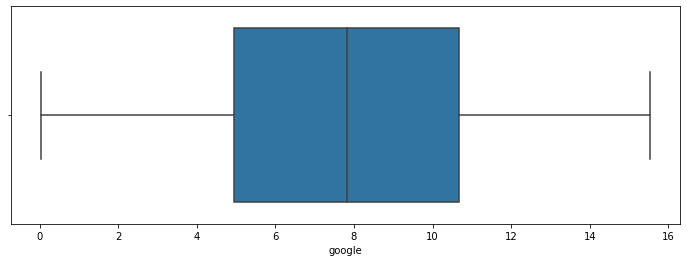

In [284]:

plt.figure(figsize=(12, 4),edgecolor='#1f3047')
sns.boxplot(df['google'])

<AxesSubplot:xlabel='email'>

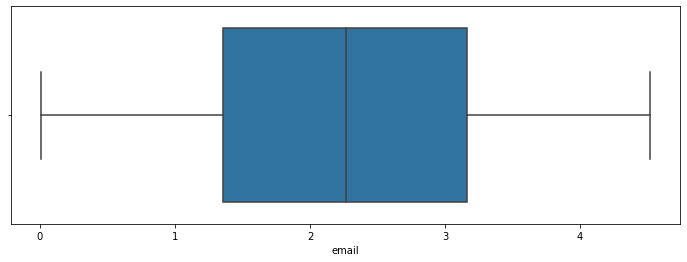

In [285]:
plt.figure(figsize=(12, 4),edgecolor='#1f3047')
sns.boxplot(df['email'])

<AxesSubplot:xlabel='gaming'>

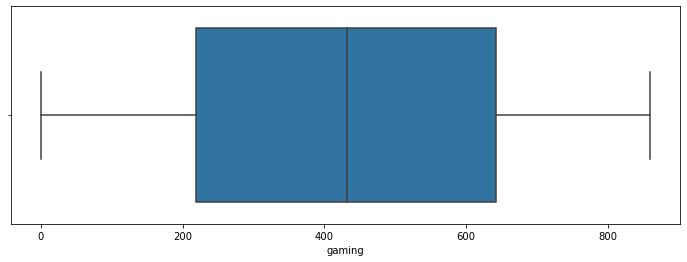

In [286]:

plt.figure(figsize=(12, 4),edgecolor='#1f3047')
sns.boxplot(df['gaming'])

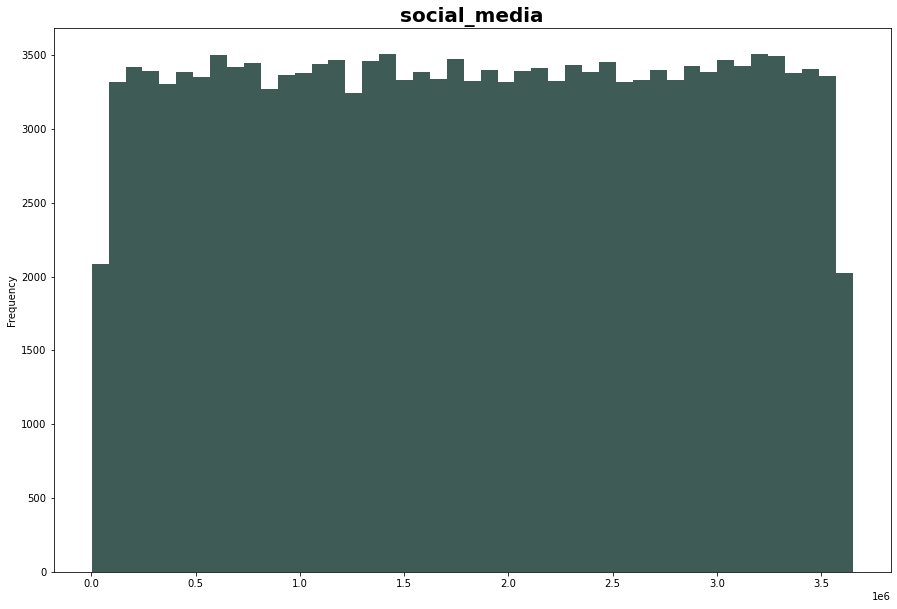

In [287]:
#social_media
numerical_features['social_media'].plot.hist(bins=45, color='#3e5c55', figsize=(15, 10))
plt.title(f'social_media', size=20, fontweight='bold')
plt.show()

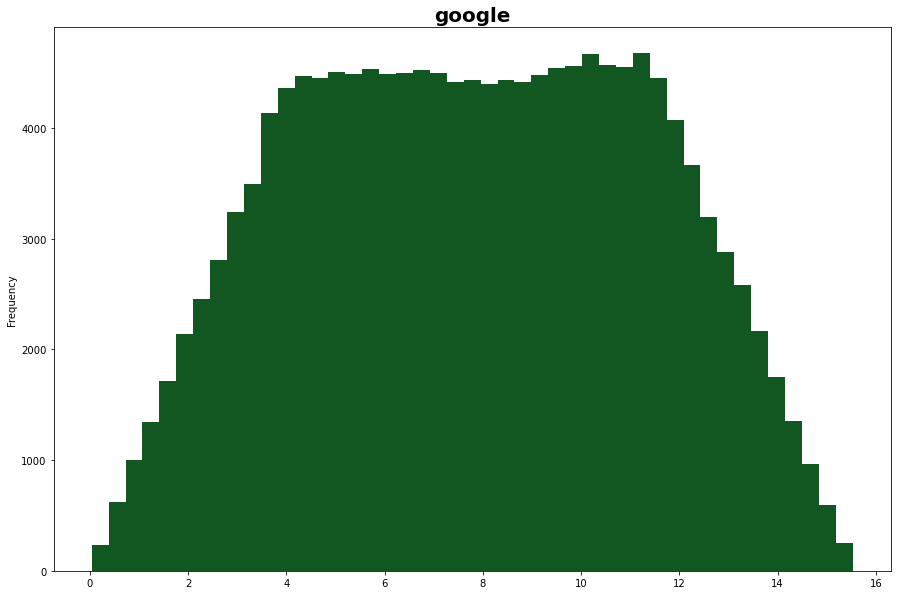

In [288]:
important_features = [ 'social_media', 'google', 'email', 'youtube', 'netflix','gaming']
numerical_features['google'].plot.hist(bins=45, color='#125721', figsize=(15, 10))
plt.title(f'google', size=20, fontweight='bold')
plt.show()

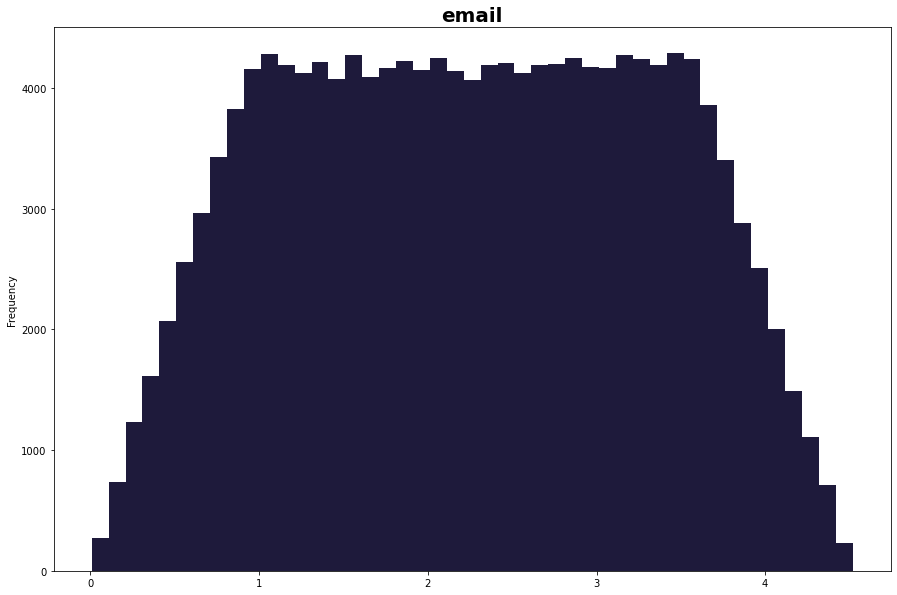

In [289]:
numerical_features['email'].plot.hist(bins=45, color='#1e1a3b', figsize=(15, 10))
plt.title(f'email', size=20, fontweight='bold')
plt.show()

#### Bivariate Analysis 

###### relationship between each application & the total DL+UL data

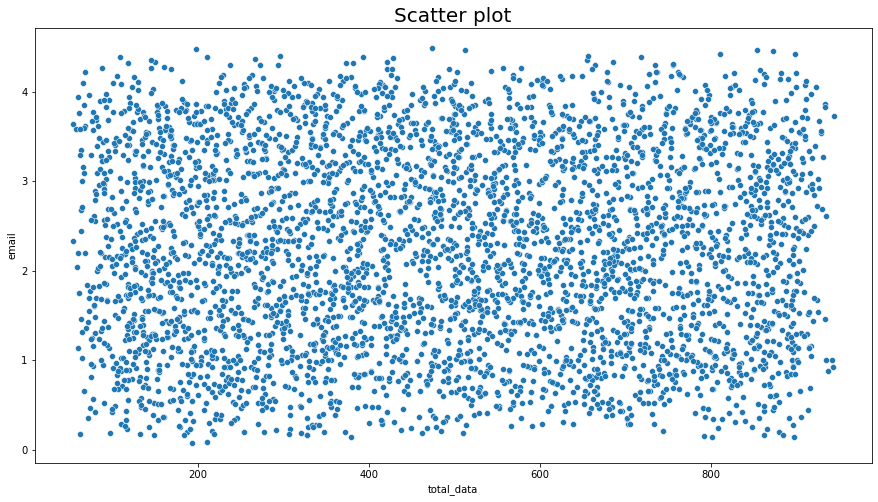

In [296]:
df_sample= df.sample(4000)
plt.figure(figsize=(15, 8))
sns.scatterplot(data = df_sample, x='total_data', y='email',)
plt.title('Scatter plot', size=20)
plt.show()

> Relationship between Total DL&UL and Email App

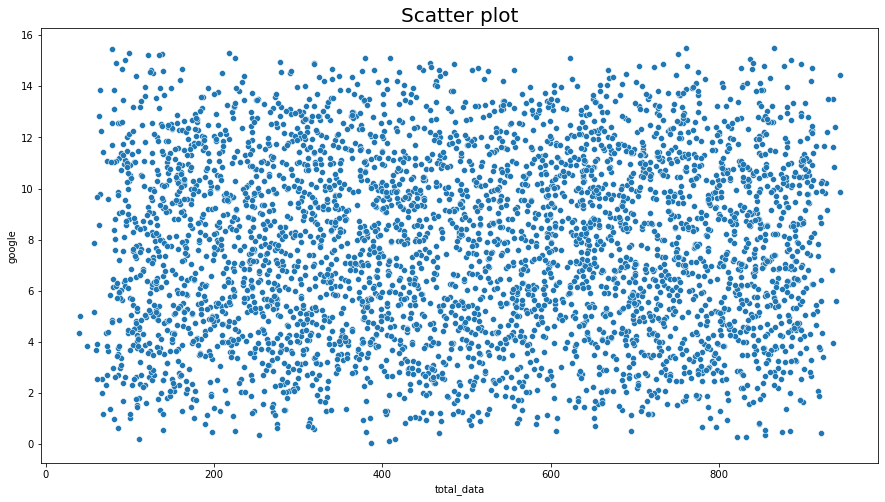

In [298]:
df_sample= df.sample(4000)
plt.figure(figsize=(15, 8))
sns.scatterplot(data = df_sample, x='total_data', y='google',)
plt.title('Scatter plot', size=20)
plt.show()

> Relationship between Total DL&UL and Google App

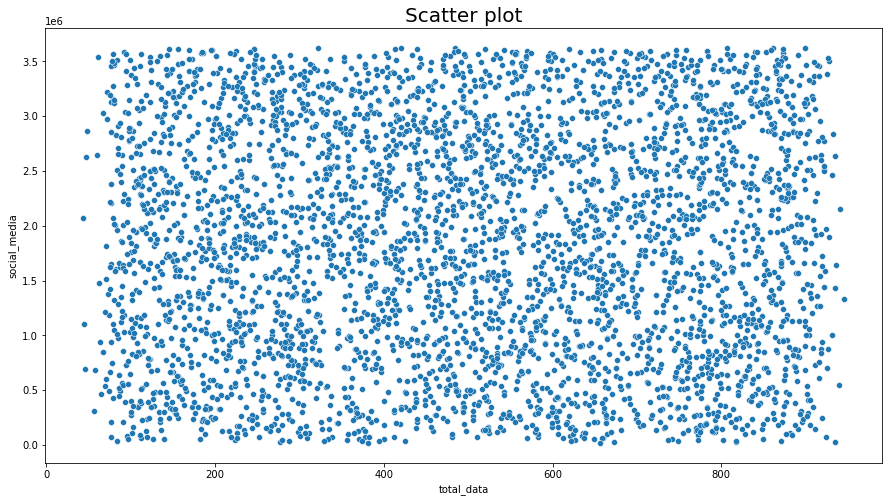

In [299]:
df_sample= df.sample(4000)
plt.figure(figsize=(15, 8))
sns.scatterplot(data = df_sample, x='total_data', y='social_media',)
plt.title('Scatter plot', size=20)
plt.show()

> Relationship between Total DL&UL and Social media Apps

#### Visualize the correlation with a plot

In [300]:
#important_features = [ 'social_media', 'google', 'email', 'youtube', 'netflix','gaming']
corr_analysis = df[['email', 'gaming', 
                    'google', 'social_media', 'youtube',
                   'netflix','other','total_data']].corr()
corr_analysis

,email,gaming,google,social_media,youtube,netflix,other,total_data
email,1.000000,-0.000644,-0.000412,0.004032,-0.002919,0.001029,-0.001299,0.003768
gaming,-0.000644,1.000000,-0.000994,0.001082,-0.002999,-0.003109,-0.002661,0.998254
google,-0.000412,-0.000994,1.000000,-0.001708,0.002277,-0.001902,-0.001727,0.013370
social_media,0.004032,0.001082,-0.001708,1.000000,0.000548,0.001013,0.006065,0.005383
youtube,-0.002919,-0.002999,0.002277,0.000548,1.000000,0.002882,0.002969,0.034888
netflix,0.001029,-0.003109,-0.001902,0.001013,0.002882,1.000000,-0.009033,0.034798
other,-0.001299,-0.002661,-0.001727,0.006065,0.002969,-0.009033,1.000000,-0.002443
total_data,0.003768,0.998254,0.013370,0.005383,0.034888,0.034798,-0.002443,1.000000


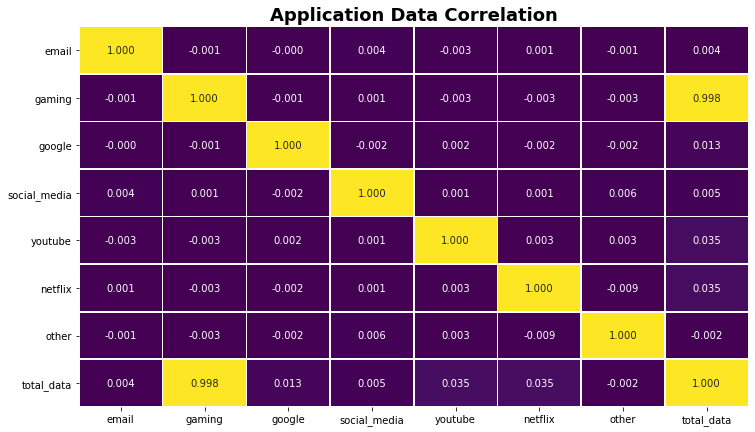

In [301]:
plt.figure(figsize=(12, 7))
sns.heatmap(corr_analysis, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.3f', linewidths=.7, cbar=False )
plt.title('Application Data Correlation', size=18, fontweight='bold')
plt.show()


#######################################################################################

In [ ]:
#saving the data to csv for user overview anlysis
cleann.to_csv("../Data/clean_telecom_data_source.csv", index = None,  header=True)